# More Pandas!

#### Prerequisites:

>- Load Datasets
>- Inspection
>- Filtering
>- Grouping and Aggregation 

### Transformation

>- Data Cleaning
>- Creating New Columns
>- Editing Dataset

#### Data Cleaning

>- df.isna().sum()
>- df.dropna()
>- df.fillna(value)
>- df.drop_duplicates()
>- df["columnName"].astype(dataType) #changes datatype
>- Example droping based on specified columns: <br>
c2 = penguins.dropna(subset=["body_mass_g", "bill_depth_mm"])<br>
c2.isnull().sum()

In [1]:
import seaborn as sns

taxis = sns.load_dataset("taxis")

**Dropping Entries with NaN values**

In [2]:
# Data Cleaning
taxis.isna().sum()
#taxis.dropna()
#taxis.isna().sum()
#clean_df = taxis.dropna()
#clean_df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

#### Creating Columns

In [3]:
import seaborn as sns
taxis = sns.load_dataset("taxis")
# Creating day_of_week and day_category
display(taxis.head(2))
#print(taxis['pickup'])
#print(type(taxis['pickup']))
#print(type(taxis['pickup'][0]))
# taxis['pickup'].dt.day_name()
taxis['day_of_week'] = taxis["pickup"].dt.day_name()

day_map = {"Monday": "Weekday",
           "Tuesday": "Weekday",
           "Wednesday": "Weekday",
           "Thursday": "Weekday",
           "Friday": "Weekday",
           "Saturday": "Weekend",
           "Sunday": "Weekend"}

taxis['day_category'] = taxis['day_of_week'].map(day_map)
display(taxis.head(2))
taxis.groupby(["day_category"]).agg({"pickup": "count"})


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,day_of_week,day_category
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,Saturday,Weekend
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,Monday,Weekday


,pickup
day_category,
Weekday,4519
Weekend,1914


In [4]:
# Trip Duration
taxis['pickup']
taxis['dropoff'] - taxis['pickup']
(taxis['dropoff'] - taxis['pickup']).dt.total_seconds()
taxis['duration_min'] = ((taxis['dropoff'] - taxis['pickup']).dt.total_seconds() / 60).round(2).astype(int)
less = taxis[taxis["duration_min"] < 15].copy() # make sure we are not editing the original
less.groupby("duration_min").agg({"pickup": "count"})
less.groupby("duration_min").agg({'fare': ["min", "max", "mean"]})


fare                  
              min    max       mean
duration_min                       
0             2.5  120.0  15.827222
1             3.0  103.0   5.113636
2             3.0    5.5   4.013966
3             1.0    6.5   4.598616
4             4.5   55.0   5.377465
5             4.5   11.5   5.798030
6             5.0   10.0   6.393976
7             5.0   25.0   7.140665
8             6.5   52.0   8.032086
9             5.5   19.5   8.358311
10            7.5   21.5   9.218153
11            7.5   35.0   9.842960
12            4.5   19.0  10.592664
13            9.0   21.0  11.028634
14            9.5   28.5  12.220812

#### Editing the Dataset

In [ ]:
###################################################
#   BE CAREFUL - MAY HAVE UNWANTED SIDE EFFECTS!  #
###################################################

import seaborn as sns
taxis = sns.load_dataset("taxis")

clean_df = taxis.dropna()
clean_df.isna().sum()
clean_df.rename(columns={"pickup": "pickup_time", "dropoff": "dropoff_time"}, inplace=True)
clean_df.sort_values(by=["fare"], ascending=False, inplace=True)

# use inplace argument that will create shit in place., you will get cmments saying 


# clean_df['duration_min'] = ((df['dropoff'] - clean_df['pickup']).dt.total_seconds() / 60).round(2).astype(int)
# less = clean_df[clean_df["duration_min"] < 15]
# less.groupby("duration_min").agg({"pickup": "count"})
# less.groupby("duration_min").agg({'fare': ["min", "max", "mean"]})

/tmp/ipykernel_31703/2346732001.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.rename(columns={"pickup": "pickup_time", "dropoff": "dropoff_time"}, inplace=True)
/tmp/ipykernel_31703/2346732001.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.sort_values(by=["fare"], ascending=False, inplace=True)


**Practice Transforming**
1. Use `df.drop("columnName", axis=1)` to delete a column - any column you want.
1. Add another column to the dataFrame - any column you want.
1. Use `df["Island"].str.upper()` to upper case the column elements.
1. Rearrange the columns. To do this, use the following: `df = df[["col1", "col2", ...]]`

In [6]:
# Practice Transforming


### Introduction to Matplotlib

**Types of Plots (for our course)**

| Plot Type     | Description                                                  |
|---------------|--------------------------------------------------------------|
| Line Plot     | Shows how a value changes over time.                         |
| Bar Plot      | Compares values or properties across different groups.       |
| Histogram     | Displays the frequency distribution of a single variable.    |
| Scatter Plot  | Reveals relationships or correlations between two variables. |


**Each Plot Should Include:**

>- Title, X and Y Axis Labels
>- Legend when appropriate

#### Histogram Graph

| Plot Type     | Description                                                  |
|---------------|--------------------------------------------------------------|
| Histogram     | Displays the frequency distribution of a single variable.    |

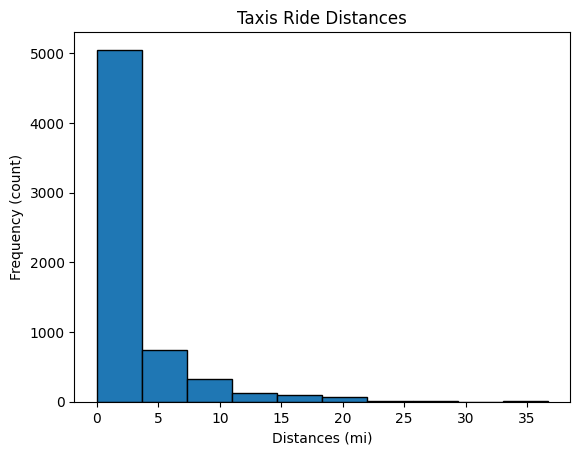

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

taxis = sns.load_dataset("taxis")
fig, ax = plt.subplots()
ax.hist(taxis['distance'], edgecolor='black') # histogram give column of data, frequency of values

ax.set_title("Taxis Ride Distances")
ax.set_xlabel("Distances (mi)")
ax.set_ylabel("Frequency (count)")

plt.show()

# TODO
#  filter the data so that the distances are less than 2
#  then create a histogram graph

#### Bar Plot

| Plot Type     | Description                                                  |
|---------------|--------------------------------------------------------------|
| Bar Plot      | Compares values or properties across different groups.       |

,pickup
day_category,
Weekday,4519
Weekend,1914


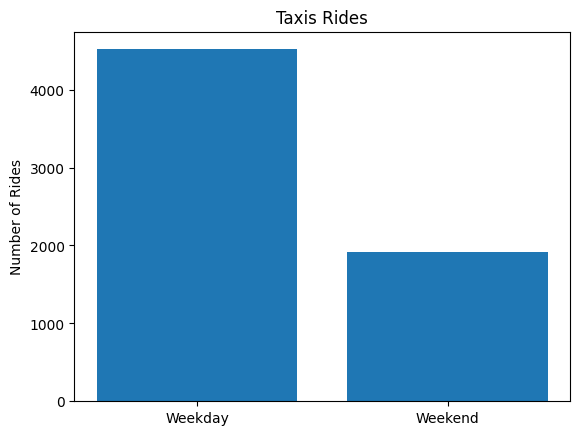

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

taxis = sns.load_dataset("taxis")

taxis['day_of_week'] = taxis["pickup"].dt.day_name()

day_map = {"Monday": "Weekday",
           "Tuesday": "Weekday",
           "Wednesday": "Weekday",
           "Thursday": "Weekday",
           "Friday": "Weekday",
           "Saturday": "Weekend",
           "Sunday": "Weekend"}

taxis['day_category'] = taxis['day_of_week'].map(day_map)
df = taxis.groupby(["day_category"]).agg({"pickup": "count"})
display(df)

fig, ax = plt.subplots()
ax.bar(df.index, df['pickup']) # what you want to plot on x axis, what you want to plot on y axis(height)

ax.set_title("Taxis Rides")
ax.set_ylabel("Number of Rides")

plt.show()

# TODO
#  What if we consider Friday the weekend? Would the number of pickups be more over the weekend?

#### Scatter Plot

| Plot Type     | Description                                                  |
|---------------|--------------------------------------------------------------|
| Scatter Plot  | Reveals relationships or correlations between two variables. |

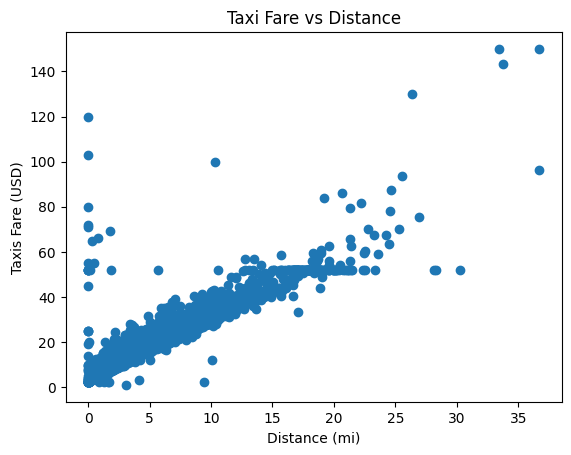

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

taxis = sns.load_dataset("taxis")

fig, ax = plt.subplots()
ax.scatter(taxis['distance'], taxis['fare'])

ax.set_title("Taxi Fare vs Distance")
ax.set_xlabel("Distance (mi)")
ax.set_ylabel("Taxis Fare (USD)")

plt.show()

# TODO
#  filter the data so that distances are less than 5
#  then create the scatter plot

#### Line Plot

| Plot Type     | Description                                                  |
|---------------|--------------------------------------------------------------|
| Line Plot     | Shows how a value changes over time.                         |

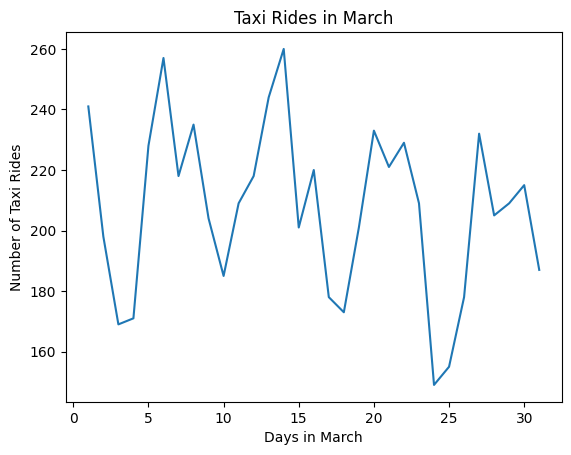

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

taxis = sns.load_dataset("taxis")
df = taxis[taxis['pickup'].dt.month == 3].copy() # March data
df['day'] = df['pickup'].dt.day #cpu;piu ovvrr days
#df = df[['pickup', 'day']].sort_values('day')

df = df.groupby('day').count()
# day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# df = df.reindex(day_order)

fig, ax = plt.subplots()
ax.plot(df.index, df['pickup'])

ax.set_title("Taxi Rides in March")
ax.set_xlabel("Days in March")
ax.set_ylabel("Number of Taxi Rides")

plt.show()

# TODO
#  Adjust the code to find the number of rides for the days of the week
#  and then plot a the number of rides over the days of the week
#  note: you will need .dt.day_name() and the commented out code